**(DELETE ME BEFORE HAND-IN)**

## Project Info

Due date : **Oct 16, 2020**

Datasets download date : Oct. 4, 2020

[Mobility data]((https://www.google.com/covid19/mobility/)) : Oct. 6, 2020

Report : **[link](https://www.overleaf.com/1565627256hwfspnsrddqy)**

---

## Previous works
- [The Pace and Pulse of the Fight against Coronavirus across the US, A Google Trends Approach](https://arxiv.org/abs/2005.02489)
- [How to Best Predict the Daily Number of New Infections of Covid-19](https://arxiv.org/abs/2004.03937)

---

## Useful blogs and articles
- [data cleaning](https://towardsdatascience.com/what-is-data-cleaning-how-to-process-data-for-analytics-and-machine-learning-modeling-c2afcf4fbf45)
- [data manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
- [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro)
- [Kaggle](https://www.kaggle.com/)
- [CDC COVID-19 Symptoms](https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html)
- [COVID-19 Symptoms poster](https://www.cdc.gov/coronavirus/2019-ncov/downloads/COVID19-symptoms.pdf)
- [cross-validation](https://www.ritchieng.com/machine-learning-cross-validation/)
- [cross-validation KNN](https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4)

---

## Ideas
- make separate plots for related symptoms for regional search over time (y-axis should be states rather than symptoms; multiple plots should made for different symptoms)

# Analyzing COVID-19 Search Trends and Hospitalization

Group 39 : Yuqi Liu, Anthony Ma, Chenxuan Zhou


## Task 1: Acquire, preprocess, and analyze the data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
ds1 = '/content/gdrive/My Drive/COMP 551 Project 1/ds1_search_trend.csv'
ds2 = '/content/gdrive/My Drive/COMP 551 Project 1/ds2_hospitalization.csv'
ds3 = '/content/gdrive/My Drive/COMP 551 Project 1/ds3_us_daily_mobility.csv'

In [3]:
import pandas as pd
import numpy as np

### Clean Dataset 1

In [4]:
df1 = pd.read_csv(ds1)
# remove empty columns
df1 = df1.dropna(how='all', axis=1)
# region_name
df1 = df1.rename(columns={'sub_region_1': 'region_name'})
# convert string date to datetime
df1['date'] = df1['date'].astype('datetime64[ns]')
# Drop other codes and names
df1 = df1[[col for col in df1 if (col.startswith('symptom:') or col in ['date','region_name'])]]
# Drop empty columns
df1 = df1.dropna(axis=1,how='all')

# rename "symptom:aSymptom" to "aSymptom"
df1.columns = df1.columns.str.lstrip('symptom:')

df1

,region_name,date,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amblyopia,Amenorrhea,Angular cheilitis,Anosmia,Aphonia,Ascites,Asphyxia,Atheroma,Auditory hallucination,Balance disorder,Beau's lines,Bleeding on probing,Burning Chest Pain,Burning mouth syndrome,Cataplexy,Chancre,Chorea,Cleft lip and cleft palate,Clouding of consciousness,Compulsive hoarding,Crackles,Crepitus,Croup,Cyanosis,Depersonalization,Developmental disability,Dysautonomia,Dysgeusia,Dyspareunia,Dystonia,Dysuria,Epiphora,Esophagitis,Eye pain,Facial swelling,...,Osteophyte,Papule,Paranoia,Pericarditis,Petechia,Photodermatitis,Photophobia,Photopsia,Pleurisy,Polycythemia,Polydipsia,Polyuria,Postural orthostatic tachycardia syndrome,Ptosis,Pulmonary edema,Rectal pain,Rectal prolapse,Renal colic,Rheum,Round ligament pain,Rumination,Sensitivity to sound,Shallow breathing,Spasticity,Splenomegaly,Sputum,Stomach rumble,Stridor,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Upper respiratory tract infection,Urethritis,Urinary urgency,Vasculitis,Ventricular fibrillation,Viral pneumonia,Yawn
0,Alaska,2020-01-06,12.69,NaN,NaN,NaN,12.29,NaN,NaN,NaN,NaN,10.31,11.10,8.92,11.10,7.93,11.90,NaN,12.10,12.29,28.36,12.10,18.05,NaN,NaN,8.33,12.49,25.78,10.51,12.10,16.06,NaN,7.93,7.93,14.87,15.47,8.13,9.12,15.47,8.72,...,16.66,11.30,8.72,8.13,11.10,NaN,11.50,NaN,NaN,12.89,NaN,9.12,NaN,11.30,11.30,NaN,18.24,21.02,NaN,14.28,13.68,8.13,NaN,9.12,8.33,18.24,NaN,10.31,9.91,7.93,14.28,15.86,11.90,18.84,13.88,NaN,14.08,9.91,NaN,14.28
1,Alaska,2020-01-13,9.56,NaN,NaN,NaN,12.62,NaN,NaN,NaN,NaN,13.20,13.20,8.61,10.90,11.86,9.56,NaN,10.33,14.92,20.27,11.47,34.81,9.95,NaN,8.22,NaN,25.05,11.86,7.65,20.27,11.09,NaN,NaN,17.79,13.01,12.81,10.71,11.67,11.67,...,13.77,13.20,13.01,11.47,11.09,NaN,8.22,15.49,NaN,13.96,NaN,9.75,NaN,7.84,8.03,8.41,20.46,16.83,11.47,18.36,NaN,8.80,NaN,9.56,10.90,17.79,9.18,15.49,13.77,10.71,13.39,12.24,7.84,16.83,13.01,7.65,15.30,8.41,NaN,16.26
2,Alaska,2020-01-20,NaN,NaN,NaN,NaN,14.17,NaN,7.36,NaN,NaN,14.90,10.49,8.28,11.78,11.96,17.66,NaN,11.22,11.04,18.03,11.59,19.14,8.83,NaN,8.28,10.49,29.99,7.73,NaN,24.11,10.12,11.04,8.46,17.85,15.82,9.75,9.20,15.27,10.86,...,14.17,13.98,18.77,8.28,10.49,NaN,10.86,13.62,NaN,12.14,8.46,8.10,NaN,10.86,8.65,7.91,18.40,11.41,9.20,15.46,13.98,8.46,NaN,9.57,12.33,25.02,8.46,14.90,9.20,12.33,12.88,17.66,15.27,18.40,12.14,7.54,10.30,16.19,NaN,17.48
3,Alaska,2020-01-27,15.31,7.47,NaN,NaN,15.67,7.47,NaN,7.65,NaN,12.03,11.84,13.12,NaN,12.03,9.11,NaN,9.47,13.85,23.87,12.94,15.49,9.84,NaN,10.39,12.39,29.52,9.84,8.20,13.48,8.56,8.93,8.02,13.67,11.30,9.66,10.57,12.57,11.48,...,20.95,11.30,13.67,14.58,14.58,NaN,8.56,16.76,NaN,12.57,NaN,NaN,NaN,10.02,12.57,9.66,11.30,16.40,12.57,21.50,10.20,12.57,NaN,8.93,10.75,20.41,9.11,15.12,8.93,10.02,13.30,12.76,9.84,20.41,17.49,NaN,11.30,NaN,NaN,10.93
4,Alaska,2020-02-03,8.81,NaN,NaN,NaN,13.87,8.06,NaN,12.56,NaN,14.24,9.75,8.81,13.12,NaN,9.00,7.50,14.62,14.24,21.55,15.37,13.12,NaN,NaN,10.31,9.93,39.36,10.87,9.37,16.12,8.62,9.93,11.06,20.43,16.87,NaN,12.56,11.62,11.24,...,16.12,14.81,16.12,13.12,11.62,NaN,14.81,16.49,NaN,14.24,NaN,8.62,NaN,10.12,11.06,NaN,17.24,17.62,12.93,19.68,10.50,12.56,NaN,14.43,10.87,20.62,8.43,11.43,11.81,18.18,11.81,16.68,10.68,20.62,16.87,NaN,14.24,10.68,10.5,18.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Wyoming,2020-08-24,4.42,3.31,3.42,5.19,3.42,NaN,2.65,NaN,6.68,3.75,2.93,4.53,5.08,3.04,4.91,2.54,4.80,3.42,3.42,3.70,3.42,3.31,3.42,NaN,2.76,NaN,2.93,2.87,17.94,3.37,4.09,3.26,6.24,4.75,2.37,4.42,4.53,NaN,...,4.80,2.93,4.14,2.48,2.32,NaN,2.54,5.91,4.47,6.41,2.37,4.31,5.69,NaN,3.92,NaN,3.20,4.47,4.14,3.98,NaN,3.87,NaN,2.93,3.92,NaN,NaN,NaN,2.82,NaN,3.98,3.87,2.26,3.98,4.09,NaN,3

### Clean Dataset 2

In [5]:
df2 = pd.read_csv(ds2)

# select US regions
df2 = df2[df2['open_covid_region_code'].str.contains('US-')]
# reset index
df2.reset_index(drop=True, inplace=True)
# convert to weekly
df2['date'] = df2['date'].astype('datetime64[ns]')
df2 = df2.groupby("region_name").resample('W-Mon', label='right', closed = 'right', on='date').sum().reset_index()

df2_all = df2.copy()  # a copy which preserve all culumns
# select columns
df2 = df2[['region_name', 'date', 'hospitalized_new']]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
'''
from google.colab import files
df2.to_csv('df2.csv', index=False)
files.download('df2.csv')
'''

"\nfrom google.colab import files\ndf2.to_csv('df2.csv', index=False)\nfiles.download('df2.csv')\n"

### Merge datasets

In [7]:
merge_by = ['date','region_name']
df = pd.merge(df2, df1, on=merge_by)

# for graphing purpose
df_all = pd.merge(df2_all, df1, on=merge_by)

In [8]:
# drop cols with more than 25% non NaN values
# df = df.dropna(axis = 1, how='all')
df = df.dropna(thresh=0.25*df.shape[0], axis=1)

# drop rows with more than 50% non NaN values
df = df.dropna(thresh=0.25*df.shape[1], axis=0)

# fill the NaN with 0
df = df.fillna(0).reset_index(drop=True)
null_count = df.isnull().sum(axis=0).to_frame()
#null_count.to_csv("ds1_null_colomns.csv")
df

,region_name,date,hospitalized_new,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Aphonia,Asphyxia,Atheroma,Auditory hallucination,Balance disorder,Beau's lines,Burning Chest Pain,Cataplexy,Chorea,Cleft lip and cleft palate,Clouding of consciousness,Crackles,Crepitus,Croup,Cyanosis,Depersonalization,Dysautonomia,Dysgeusia,Dyspareunia,Dystonia,Dysuria,Epiphora,Esophagitis,Eye pain,Facial swelling,Fibrocystic breast changes,Focal seizure,Gastroparesis,Gingival recession,Globus pharyngis,Grandiosity,...,Male infertility,Mitral insufficiency,Muscle atrophy,Myoclonus,Nasal polyp,Neck mass,Neutropenia,Night terror,Nocturnal enuresis,Nystagmus,Onychorrhexis,Osteophyte,Papule,Pericarditis,Petechia,Photodermatitis,Photophobia,Polydipsia,Polyuria,Ptosis,Pulmonary edema,Rectal pain,Rectal prolapse,Rheum,Rumination,Sensitivity to sound,Shallow breathing,Spasticity,Splenomegaly,Stomach rumble,Stridor,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Urethritis,Urinary urgency,Ventricular fibrillation,Viral pneumonia
0,Alaska,2020-03-09,0.0,10.60,0.00,11.61,12.79,0.00,7.07,7.91,13.80,13.97,0.00,15.99,13.29,0.00,13.29,8.92,14.13,0.00,0.00,0.00,34.33,8.58,0.00,9.76,8.25,9.26,13.13,14.13,7.57,12.45,10.60,0.00,12.79,9.93,13.80,12.12,10.60,13.63,...,10.94,7.07,10.10,7.07,9.42,10.43,18.01,8.75,12.96,12.45,11.61,13.46,12.45,0.00,18.34,0.0,9.42,0.00,9.09,11.11,7.57,7.07,12.28,13.46,8.58,10.27,8.08,0.00,11.95,0.00,13.97,24.06,10.43,12.96,11.11,13.97,10.27,0.00,0.00,18.85
1,Alaska,2020-03-16,0.0,11.69,0.00,6.39,0.00,0.00,15.59,7.95,11.07,11.85,0.00,9.82,9.97,9.51,9.20,9.51,9.35,0.00,8.57,0.00,48.00,10.29,7.64,8.73,8.88,13.09,9.35,12.16,7.17,10.75,10.13,7.17,7.64,10.44,12.00,0.00,12.31,9.04,...,7.79,7.64,12.00,0.00,9.20,0.00,10.44,0.00,10.13,6.23,12.00,7.01,8.26,7.64,0.00,0.0,7.64,0.00,7.48,0.00,9.04,7.33,11.07,11.22,11.85,0.00,10.91,7.95,8.88,9.82,12.94,8.88,9.20,11.22,14.49,9.04,12.00,0.00,0.00,24.94
2,Alaska,2020-03-23,0.0,11.15,16.57,0.00,9.53,0.00,45.17,0.00,9.39,11.44,6.45,9.97,11.15,14.08,11.44,15.99,10.85,0.00,8.36,0.00,36.96,8.80,0.00,7.19,15.99,7.77,11.15,12.47,14.96,7.77,14.08,8.36,11.00,5.87,6.31,5.87,13.35,12.47,...,5.87,6.75,8.80,0.00,7.33,12.91,8.65,7.04,8.51,6.89,10.85,11.73,13.20,13.79,14.67,0.0,9.53,0.00,9.09,7.63,8.21,6.31,10.41,11.00,11.44,11.15,9.24,9.53,11.59,7.33,10.85,9.97,11.88,10.41,7.63,8.36,8.80,0.00,7.04,13.79
3,Alaska,2020-03-30,7.0,8.96,8.96,7.11,8.53,0.00,19.05,0.00,11.94,7.54,6.54,10.95,12.51,8.53,12.37,11.66,9.95,6.68,0.00,0.00,25.17,10.95,9.81,0.00,13.79,7.25,0.00,8.96,7.82,10.95,17.20,6.97,8.39,6.11,5.83,8.82,12.37,10.24,...,11.38,6.68,9.10,5.69,8.67,6.11,7.96,7.39,13.08,8.82,10.24,0.00,11.94,10.10,15.07,0.0,8.53,8.11,0.00,6.83,10.38,0.00,9.81,0.00,9.10,7.39,10.81,0.00,7.82,6.40,12.51,6.97,12.94,9.95,9.38,14.79,9.81,7.96,7.11,8.82
4,Alaska,2020-04-06,16.0,10.08,7.35,0.00,10.80,7.06,6.77,0.00,9.65,11.52,0.00,10.80,9.65,7.20,0.00,15.85,10.08,0.00,7.20,0.00,15.99,12.53,7.06,0.00,11.38,8.07,9.07,12.82,0.00,14.55,12.82,5.91,6.77,8.36,11.96,6.34,12.10,12.10,...,7.49,0.00,7.92,0.00,9.51,7.20,7.06,8.79,9.22,9.51,5.76,7.35,6.48,8.93,9.65,0.0,9.51,6.19,5.76,9.94,9.36,10.37,10.52,8.21,9.07,7.49,7.06,7.20,10.08,10.23,0.00,8.50,9.65,9.22,8.64,13.83,10.08,0.00,0.00,9.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Wyoming,2020-08-24,16.0,4.42,3.31,3.42,3.42,0.00,2.65,0.00,3.75,2.93,4.53,5.08,3.04,2.54,3.42,3.70,3.42,3.31,0.00,2.76,0.00,2.93,2.87,3.37,4.09,3.26,6.24,4.75,2.37,4.42,4.53,0.00,2.43,4.09,6.24,4.47,2.76,5.08,...,3.92,3.15,3.64,2.60,0.00,4.36,3.59,3.48,3.98,3.37,2.93,4.80,2.93,2.48,2.32,0.0,2.54,2.37,4.31,0.00,3.92,0.00,3.20,4.14,0.00,3.87,0.00,2.93,3.92,0.00,0.00,2.82,0.00,3.98,3.87

In [9]:
'''
from google.colab import files
df.to_csv('df.csv', index=False)
files.download('df.csv')
'''

"\nfrom google.colab import files\ndf.to_csv('df.csv', index=False)\nfiles.download('df.csv')\n"

### Demeaning

In [10]:
class DemeanWrapper:
    def __call__(self, df):
      transformed = df.iloc[:, 2:].copy()
      mean = transformed.mean()
      transformed = (transformed - mean) / mean
      return pd.DataFrame(transformed, columns=df.columns[2:], index=df.index)

In [11]:
df_rescaled = df.copy()
df_rescaled = (
    df_rescaled.groupby("region_name")
    .apply(DemeanWrapper())
)
df_rescaled.insert(loc=0, column='date', value=df['date'].values.ravel())
df_rescaled.insert(loc=0, column='region_name', value=df['region_name'].values.ravel())
df_rescaled['hospitalized_new'] = df['hospitalized_new']

# remove any row with inf.
df_rescaled = df_rescaled.replace([np.inf, -np.inf], np.nan).fillna(0)

df = df_rescaled
df_rescaled

,region_name,date,hospitalized_new,Adrenal crisis,Ageusia,Allergic conjunctivitis,Amenorrhea,Angular cheilitis,Anosmia,Aphonia,Asphyxia,Atheroma,Auditory hallucination,Balance disorder,Beau's lines,Burning Chest Pain,Cataplexy,Chorea,Cleft lip and cleft palate,Clouding of consciousness,Crackles,Crepitus,Croup,Cyanosis,Depersonalization,Dysautonomia,Dysgeusia,Dyspareunia,Dystonia,Dysuria,Epiphora,Esophagitis,Eye pain,Facial swelling,Fibrocystic breast changes,Focal seizure,Gastroparesis,Gingival recession,Globus pharyngis,Grandiosity,...,Male infertility,Mitral insufficiency,Muscle atrophy,Myoclonus,Nasal polyp,Neck mass,Neutropenia,Night terror,Nocturnal enuresis,Nystagmus,Onychorrhexis,Osteophyte,Papule,Pericarditis,Petechia,Photodermatitis,Photophobia,Polydipsia,Polyuria,Ptosis,Pulmonary edema,Rectal pain,Rectal prolapse,Rheum,Rumination,Sensitivity to sound,Shallow breathing,Spasticity,Splenomegaly,Stomach rumble,Stridor,Subdural hematoma,Tachypnea,Tenderness,Thyroid nodule,Trichoptilosis,Urethritis,Urinary urgency,Ventricular fibrillation,Viral pneumonia
0,Alaska,2020-03-09,0.0,0.053136,-1.000000,1.320560,0.296390,-1.000000,-0.319199,5.113806,-0.070426,0.702227,-1.000000,0.477395,0.291459,-1.000000,0.591420,-0.034704,0.231909,-1.000000,-1.000000,-1.000000,1.847414,0.033134,-1.000000,0.911270,-0.066524,0.044293,0.059136,0.237191,0.145414,0.239614,-0.131614,-1.000000,0.477023,0.070322,0.359837,0.160191,0.269356,0.055489,...,0.055387,-0.062849,0.002842,0.547864,0.318818,0.044044,0.848029,0.106388,0.145400,0.305031,0.467762,0.083165,0.030894,-1.000000,0.605954,-1.0,0.153193,-1.000000,0.068545,0.251466,0.686746,0.596683,-0.004779,0.680761,0.006391,0.075470,1.633993,-1.000000,0.252711,-1.000000,1.807165,1.557323,0.303076,0.165251,-0.093010,0.309871,-0.110451,-1.000000,-1.000000,5.147661
1,Alaska,2020-03-16,0.0,0.161431,-1.000000,0.277207,-1.000000,-1.000000,0.501229,5.144723,-0.254320,0.443908,-1.000000,-0.092682,-0.031163,1.436953,0.101660,0.029144,-0.184830,-1.000000,1.588315,-1.000000,2.981238,0.239038,-0.113334,0.709569,0.004760,0.476220,-0.245779,0.064702,0.084890,0.070350,-0.170118,-0.273226,-0.117713,0.125293,0.182467,-1.000000,0.474130,-0.299955,...,-0.248495,0.012707,0.191495,-1.000000,0.288018,-1.000000,0.071262,-1.000000,-0.104715,-0.346960,0.517067,-0.435885,-0.316049,-0.091446,-1.000000,-1.0,-0.064714,-1.000000,-0.120713,-1.000000,1.014291,0.655401,-0.102842,0.401051,0.389945,-1.000000,2.556542,0.040200,-0.069115,0.597106,1.600194,-0.056150,0.149405,0.008805,0.182924,-0.152381,0.039395,-1.000000,-1.000000,7.133828
2,Alaska,2020-03-23,0.0,0.107780,2.061481,-1.000000,-0.034043,-1.000000,3.349615,-1.000000,-0.367486,0.393950,0.050253,-0.078822,0.083504,2.608023,0.369890,0.730390,-0.054054,-1.000000,1.524891,-1.000000,2.065553,0.059625,-1.000000,0.407995,0.809247,-0.123741,-0.100581,0.091845,1.263592,-0.226361,0.153479,-0.152604,0.270309,-0.367292,-0.378220,-0.438092,0.598670,-0.034340,...,-0.433718,-0.105266,-0.126237,-1.000000,0.026214,0.292292,-0.112412,-0.109832,-0.247890,-0.277778,0.371681,-0.056054,0.092996,0.639916,0.284588,-1.0,0.166660,-1.000000,0.068545,-0.140532,0.829351,0.425045,-0.156331,0.373579,0.341854,0.167624,2.012140,0.246932,0.214973,0.192137,1.180225,0.059705,0.484232,-0.064023,-0.377108,-0.216140,-0.237777,-1.000000,0.127831,3.497413
3,Alaska,2020-03-30,7.0,-0.109802,0.655454,0.421118,-0.135402,-1.000000,0.834407,-1.000000,-0.195717,-0.081261,0.064907,0.011725,0.215662,1.185827,0.481254,0.261811,-0.132520,0.128773,-1.000000,-1.000000,1.087662,0.318510,0.138506,-1.000000,0.560320,-0.182384,-1.000000,-0.215483,0.183241,0.090263,0.409079,-0.293499,-0.031101,-0.341424,-0.425518,-0.155702,0.481315,-0.207028,...,0.097834,-0.114544,-0.096449,0.245735,0.213817,-0.388388,-0.183214,-0.065577,0.156005,-0.075472,0.294564,-1.000000,-0.011335,0.201099,0.319615,-1.0,0.044240,3.797838,-1.000000,-0.230647,1.312870,-1.000000,-0.204958,-1.000000,0.067384,-0.226122,2.523943,-1.000000,-0.180234,0.040884,1.513789,-0.259

In [12]:
'''
from google.colab import files
df_rescaled.to_csv('df_rescaled.csv', index=False)
files.download('df_rescaled.csv')
'''

"\nfrom google.colab import files\ndf_rescaled.to_csv('df_rescaled.csv', index=False)\nfiles.download('df_rescaled.csv')\n"

## Task 2: Visualize and cluster the data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
%matplotlib inline

### Visualization
Plot heatmap to visualize symptom search popularity

we group the dataset by time and take average of scores in all regions with weekly date being “row names”. Then applying heatmap to visualize, we find that there are several symptoms with high variability in popularity across time. This makes sense since we do have some features that only contains very little amount of data since they only show up in few regions, which will be discarded in our merging step in Task1. While taking average of this can help us at least keep in mind there are some features showing great variation while being discarded due to the insufficient time.

#### Visualization over symptoms

In [14]:
df_by_time = df1.groupby('date').mean().reset_index()
df_by_time.fillna(0,inplace=True)
df_by_time.shape # we have nearly 130 features

(38, 122)

Text(41.999999999999986, 0.5, 'Symptoms')

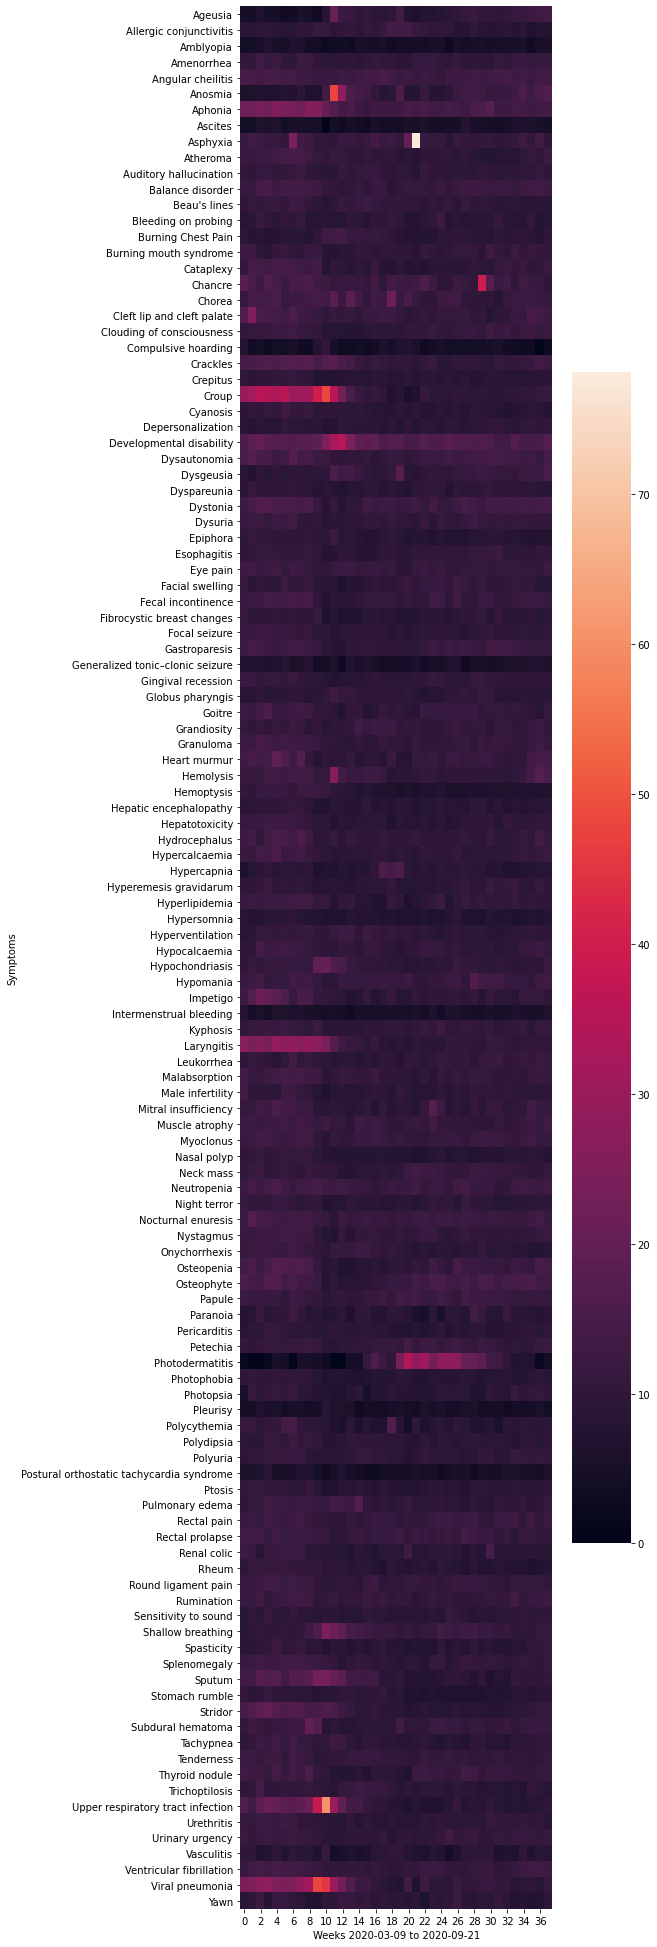

In [15]:
plt.figure(figsize = (7,35))

heat_map = sb.heatmap(df_by_time.iloc[:,2:].T)  # --> Croup, Developmental disability is the popular one

plt.xlabel("Weeks 2020-03-09 to 2020-09-21")
plt.ylabel('Symptoms') 

#### Visualization over Region

Heatmap of **viral pneumonia** search trend over regions over time.

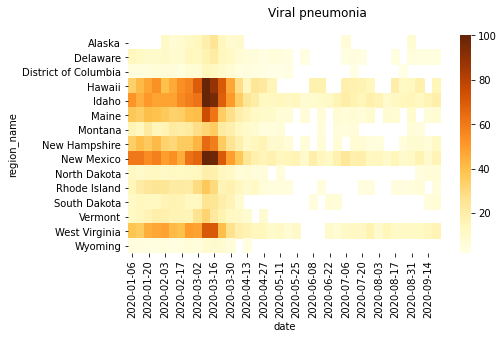

In [16]:
df_region = df1[['region_name', 'date', 'Viral pneumonia']].copy()
# show date in "%Y-%m-%d" format
df_region['date'] = df_region['date'].apply(lambda x : x.strftime("%Y-%m-%d"))

heatmap1_data = pd.pivot_table(df_region, values='Viral pneumonia', 
                               index=['region_name'], columns='date')
plt.figure(figsize=(7, 4))
plt.suptitle('Viral pneumonia')
sb.heatmap(heatmap1_data, cmap="YlOrBr")

Heatmap of **Aphonia** search trend over regions over time.

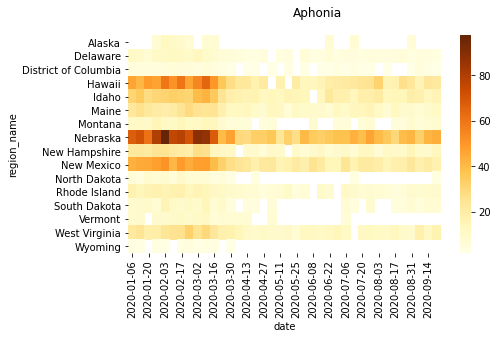

In [17]:
df_region = df1[['region_name', 'date', 'Aphonia']].copy()
# show date in "%Y-%m-%d" format
df_region['date'] = df_region['date'].apply(lambda x : x.strftime("%Y-%m-%d"))

heatmap1_data = pd.pivot_table(df_region, values='Aphonia', 
                               index=['region_name'], columns='date')
plt.figure(figsize=(7, 4))
plt.suptitle('Aphonia')
sb.heatmap(heatmap1_data, cmap="YlOrBr")

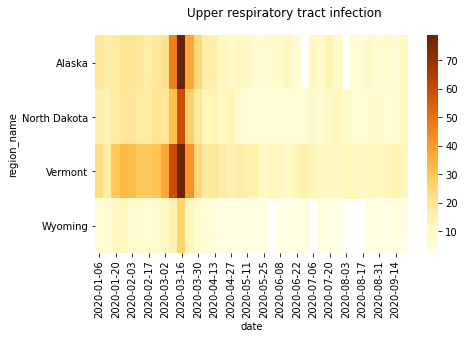

In [18]:
symptom = 'Upper respiratory tract infection'

df_region = df1[['region_name', 'date', symptom]].copy()
# show date in "%Y-%m-%d" format
df_region['date'] = df_region['date'].apply(lambda x : x.strftime("%Y-%m-%d"))

heatmap1_data = pd.pivot_table(df_region, values=symptom, 
                               index=['region_name'], columns='date')
plt.figure(figsize=(7, 4))
plt.suptitle(symptom)
sb.heatmap(heatmap1_data, cmap="YlOrBr")

['Laryngitis',
 'Aphonia',
 'Viral pneumonia',
 'Anosmia',
 'Croup',
 'Developmental disability',
 'Photodermatitis']

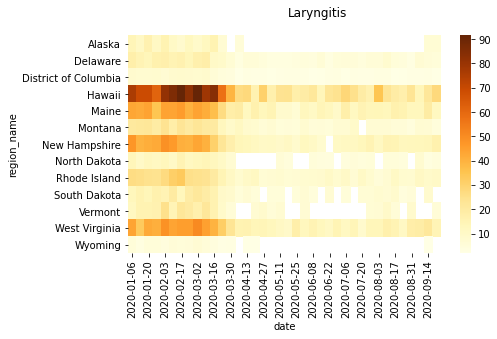

In [19]:
symptom = 'Laryngitis'
def hm_by_symptom(symptom):
  col_name = symptom
  df_region = df1[['region_name', 'date', col_name]].copy()
  # show date in "%Y-%m-%d" format
  df_region['date'] = df_region['date'].apply(lambda x : x.strftime("%Y-%m-%d"))
  heatmap1_data = pd.pivot_table(df_region, values=col_name, 
                               index=['region_name'], columns='date')
  plt.figure(figsize=(7, 4))
  plt.suptitle(symptom)
  sb.heatmap(heatmap1_data, cmap="YlOrBr")

hm_by_symptom(symptom)

symp_list = ['Laryngitis','Aphonia', 'Viral pneumonia', 'Anosmia', 'Croup','Developmental disability', 'Photodermatitis']
symp_list

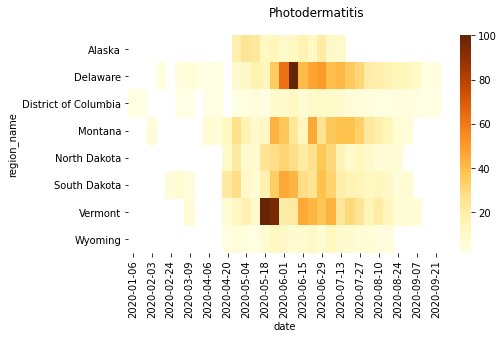

In [20]:
symptom = 'Photodermatitis'

df_region = df1[['region_name', 'date', symptom]].copy()
# show date in "%Y-%m-%d" format
df_region['date'] = df_region['date'].apply(lambda x : x.strftime("%Y-%m-%d"))

heatmap1_data = pd.pivot_table(df_region, values=symptom, 
                               index=['region_name'], columns='date')
plt.figure(figsize=(7, 4))
plt.suptitle(symptom)
sb.heatmap(heatmap1_data, cmap="YlOrBr")

Heatmap of  **hospitalization_new** over regions over time.

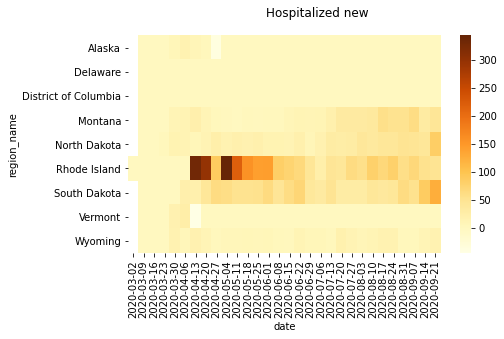

In [21]:
df2_region = df[['region_name', 'date', 'hospitalized_new']].copy()
# show date in "%Y-%m-%d" format
df2_region['date'] = df2_region['date'].apply(lambda x : x.strftime("%Y-%m-%d"))

heatmap1_data = pd.pivot_table(df2_region, values='hospitalized_new', 
                               index=['region_name'], columns='date')
plt.figure(figsize=(7, 4))
plt.suptitle('Hospitalized new')
sb.heatmap(heatmap1_data, cmap="YlOrBr")

Heatmap of  **hospitalization_cumulative** over regions over time.

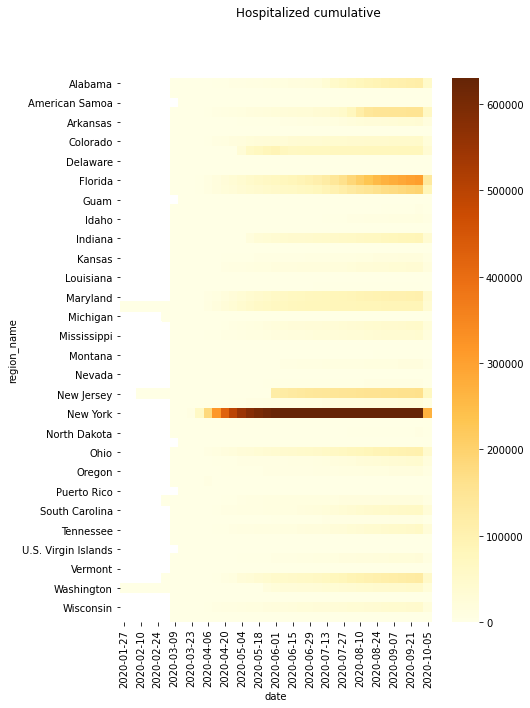

In [22]:
df2_region = df2_all[['region_name', 'date', 'hospitalized_cumulative']].copy()
# show date in "%Y-%m-%d" format
df2_region['date'] = df2_region['date'].apply(lambda x : x.strftime("%Y-%m-%d"))

heatmap1_data = pd.pivot_table(df2_region, values='hospitalized_cumulative', 
                               index=['region_name'], columns='date')
plt.figure(figsize=(7, 10))
plt.suptitle('Hospitalized cumulative')
sb.heatmap(heatmap1_data, cmap="YlOrBr")

###PCA

In [23]:
'''def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)'''

'def clean_dataset(df):\n    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"\n    df.dropna(inplace=True)\n    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)\n    return df[indices_to_keep].astype(np.float64)'

original shape:  (262, 92)
transformed shape: (262, 2)


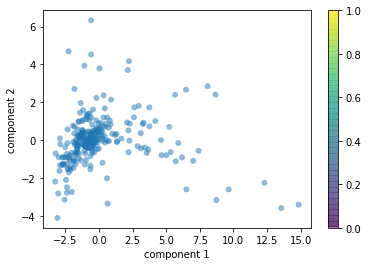

In [24]:
#Standardize it by subtracting the mean of each symptom
#df_rescaled_by_means
X = df.iloc[:, 3:].apply(lambda col: col - col.mean() ,axis = 0)
'''standardize by subtract means?'''

pca = PCA(n_components=2)

search_trend_pca = pca.fit_transform(X)

#print(pca.components_)
#print(pca.explained_variance_)

print("original shape: ", X.shape)
print("transformed shape:", search_trend_pca.shape)

#3. plot the first two principal components of each point

#print(search_trend_pca)

plt.scatter(search_trend_pca[:, 0], search_trend_pca[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


Visualize the cumulative explained variance to see how many features are enough to cover a majority of information

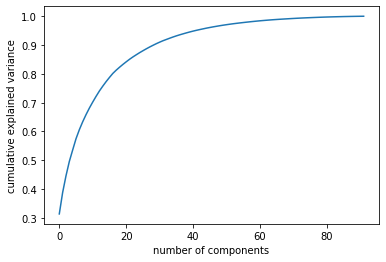

In [25]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # --> choose 5 maybe
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

###Kmeans

In [26]:
from sklearn.cluster import KMeans

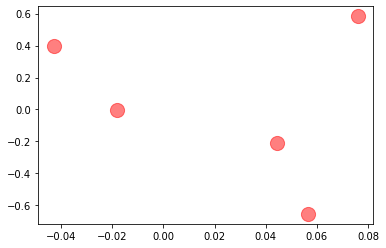

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#plt.scatter(X[:, 0], X[:, 1])
            #, c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha= 0.5);

Compare with the data after PCA:

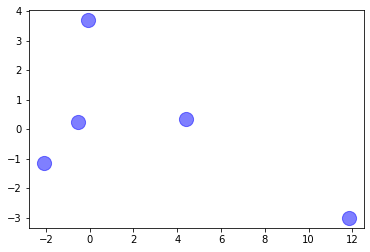

In [28]:
X_pca = search_trend_pca

kmeans_pca = KMeans(n_clusters=5)
kmeans_pca.fit(X_pca)
y_kmeans_pca = kmeans_pca.predict(X_pca)

centers_PCA = kmeans_pca.cluster_centers_
p2 = plt.scatter(centers_PCA[:, 0], centers_PCA[:, 1], c='blue', s=200, alpha= 0.5);

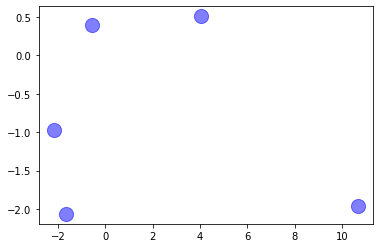

In [29]:
# this time select 5 PCs to see K-means clustering performance
pca_2 = PCA(n_components=5)
search_trend_pca_2 = pca_2.fit_transform(X)

# Do kmeans
X_pca = search_trend_pca_2
kmeans_pca = KMeans(n_clusters=5)
kmeans_pca.fit(X_pca)
y_kmeans_pca = kmeans_pca.predict(X_pca)

centers_PCA = kmeans_pca.cluster_centers_
p2 = plt.scatter(centers_PCA[:, 0], centers_PCA[:, 1], c='blue', s=200, alpha= 0.5);


As we can see, the clusters in this plot above actually differs from the one with Kmeans applying on the whole dataset, with an obvious difference of cluster on the upper left corner, which may suggest an outlier of data (noise). By PCA with 7 PCs, we may have a better performance on the following supervised learning tasks.

## Task 3: Supervised Learning

In [30]:
from collections import defaultdict
model_performances = defaultdict(int)

### Split by region
5-fold cross validation split by region.

In [31]:
# obtain input and target
input = df.copy()
del input['hospitalized_new']
target = df.loc[:, ['hospitalized_new']].copy()

# Get X_train and y_train
input_region = input.iloc[:, 2:].copy()
X_train=input_region.values
y_train=target.values.ravel()

# Get cross-validation group indices
states = list(set(input['region_name']))
level = len(states)/5
groups_region = input['region_name'].apply(lambda x : int(states.index(x)/level) if int(states.index(x)/level) < 4 else 4)
groups_region = groups_region.values

#### region KNN

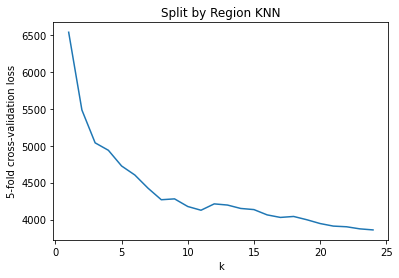

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GroupKFold
gkf = GroupKFold(n_splits=5)

k_range = range(1, 25) # n_neighbors
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    loss = abs(cross_val_score(knn, X_train, y_train, cv=gkf.split(X_train, y_train, groups_region), scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())

import matplotlib.pyplot as plt 
plt.plot(k_range, k_scores)
plt.title('Split by Region KNN')
plt.xlabel('k')
plt.ylabel('5-fold cross-validation loss')
plt.show()

In [33]:
# chosen model
import statistics
k = 15
print("n_neighbors : {}\nunscaled cross validation loss: {}".format(k,k_scores[k-1]))
model_performances['region KNN'] = k_scores[k-1]
#statistics.mean(k_scores)

n_neighbors : 15
unscaled cross validation loss: 4134.964546788752


#### region Decision Tree

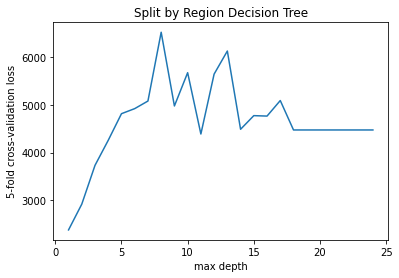

In [34]:
from sklearn.tree import DecisionTreeRegressor
d_range = range(1, 25) # max_depth
d_scores = []
for d in d_range :
  dt = DecisionTreeRegressor(max_depth=d, random_state=3)
  loss = abs(cross_val_score(dt, X_train, y_train, cv=gkf.split(X_train, y_train, groups_region), scoring='neg_mean_squared_error'))
  d_scores.append(loss.mean())
plt.plot(d_range, d_scores)
plt.title('Split by Region Decision Tree')
plt.xlabel('max depth')
plt.ylabel('5-fold cross-validation loss')
plt.show()

In [35]:
# chosen model
d = 4
print("max_depth : {}\nunscaled cross validation loss: {}".format(d,d_scores[d-1]))
model_performances['region decision tree'] = d_scores[k-1]
# statistics.mean(d_scores)

max_depth : 4
unscaled cross validation loss: 4256.838693587919


### Split by time
Keep data for the last couple of timepoints (after `2020-08-10`) from
all regions in the validation set ; train on the rest of the data

In [36]:
times = df.copy()
times = times.drop("region_name", axis=1)
times = times.sort_values('date').reset_index(drop=True)

# Get X and y

input_times = times.copy()
del input_times['date']
del input_times['hospitalized_new']

times_target = times.loc[:, ['hospitalized_new']].copy()

# select last 20% dates for training
test_dates = sorted(list(set(times['date'])))
test_dates_ind = int(0.2 * len(test_dates))
test_dates = test_dates[-test_dates_ind:]
test_ind = times.loc[times['date'].isin(test_dates)].index[0]

test_data = input_times.iloc[test_ind:]
train_data = input_times.iloc[:test_ind]
test_target = times_target.iloc[test_ind:]
train_target = times_target.iloc[:test_ind]

# obtain np_arrays
X_train=train_data.values
y_train=train_target.values.ravel()

X_test=test_data.values
y_test=test_target.values.ravel()

#### time KNN

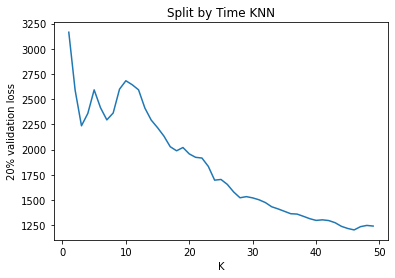

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

k_range = range(1, 50)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    loss = np.mean((knn.predict(X_test) - y_test)**2)
    k_scores.append(loss.mean())

import matplotlib.pyplot as plt 
plt.plot(k_range, k_scores)
plt.title('Split by Time KNN')
plt.xlabel('K')
plt.ylabel('20% validation loss')
plt.show()

In [38]:
# chosen model
k = 46
print("n_neighbors : {}\nunscaled cross validation loss: {}".format(k,k_scores[k-1]))
model_performances['time KNN'] = k_scores[k-1]
# statistics.mean(k_scores)

n_neighbors : 46
unscaled cross validation loss: 1202.9403224112582


#### time Decision Tree

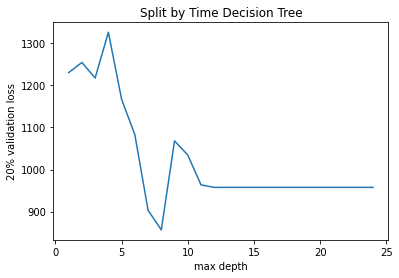

In [39]:
from sklearn.tree import DecisionTreeRegressor
d_range = range(1, 25) # max_depth
d_scores = []
for d in d_range :
  dt = DecisionTreeRegressor(max_depth=d, random_state=3)
  dt.fit(X_train, y_train)
  loss = np.mean((dt.predict(X_test) - y_test)**2)
  d_scores.append(loss.mean())
plt.plot(d_range, d_scores)
plt.title('Split by Time Decision Tree')
plt.xlabel('max depth')
plt.ylabel('20% validation loss')
plt.show()

In [40]:
# chosen model
d = 8
print("max_depth : {}\nunscaled cross validation loss: {}".format(d,d_scores[d-1]))
model_performances['time decision tree'] = d_scores[d-1]
# statistics.mean(d_scores)

max_depth : 8
unscaled cross validation loss: 856.6399856940749


### Extra : Learning using PCA data

In [41]:
# Get X and y for PCA
X = df.iloc[:, 3:].copy() # all symptoms
pca = PCA(n_components=5)
X = pca.fit_transform(X)
y = df['hospitalized_new'].values.ravel()

#### PCA with KNN

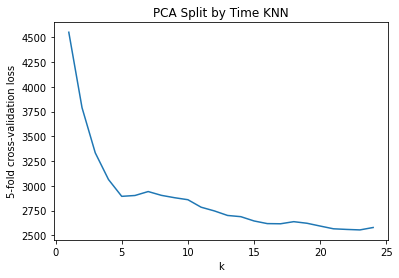

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)

k_range = range(1, 25)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    # knn.fit(X_train, y_train)
    # loss = np.mean((knn.predict(X_test) - y_test)**2)
    loss = abs(cross_val_score(knn, X, y, cv=kf.split(X, y), scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())
    

import matplotlib.pyplot as plt 
plt.plot(k_range, k_scores)
plt.title('PCA Split by Time KNN')
plt.xlabel('k')
plt.ylabel('5-fold cross-validation loss')
plt.show()

In [43]:
# chosen model
k = 23
print("n_neighbors : {}\nunscaled cross validation loss: {}".format(k,k_scores[k-1]))
model_performances['PCA by time KNN'] = k_scores[k-1]
# statistics.mean(k_scores)

n_neighbors : 23
unscaled cross validation loss: 2553.7100972341495


#### PCA with decision tree

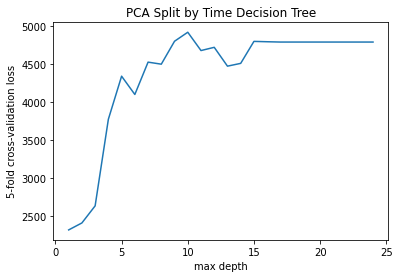

In [44]:
# Decision tree

from sklearn.tree import DecisionTreeRegressor
d_range = range(1, 25) # max_depth
d_scores = []
for d in d_range :
  dt = DecisionTreeRegressor(max_depth=d, random_state=1)
  # dt.fit(X_train, y_train)
  # loss = np.mean((dt.predict(X_test) - y_test)**2)
  loss = abs(cross_val_score(dt, X, y, cv=kf.split(X, y), scoring='neg_mean_squared_error'))
  d_scores.append(loss.mean())
plt.plot(d_range, d_scores)
plt.title('PCA Split by Time Decision Tree')
plt.xlabel('max depth')
plt.ylabel('5-fold cross-validation loss')
plt.show()

In [45]:
# chosen model
d = 6
print("max_depth : {}\nunscaled cross validation loss: {}".format(d,d_scores[d-1]))
model_performances['PCA by time decision tree'] = d_scores[d-1]
# statistics.mean(d_scores)

max_depth : 6
unscaled cross validation loss: 4098.42096156077


#### PCA with linear regression 

y is the hospitalization case number

In [46]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=True)

loss = abs(cross_val_score(lr, X, y, cv=kf.split(X, y), scoring='neg_mean_squared_error'))
loss = loss.mean()

print(loss)
model_performances['PCA by time linear regression'] = loss

2332.503779237798


### Extra : Mobility prediction KNN(baseline)

In [47]:
df3 = pd.read_csv(ds3)
del df3['Unnamed: 0']

# convert from daily to weekly
df3['date'] = df3['date'].astype('datetime64[ns]')
df3.groupby("sub_region_1").resample('W-Sat', label='right', closed = 'right', on='date').sum().reset_index()

# merge with hospitalization
merge_by = ['date','region_name']
df2['date'] = df2['date'].astype('datetime64[ns]')
df3 = df3.rename(columns={'sub_region_1': 'region_name'})
df3 = pd.merge(df2, df3, on=merge_by)
df3 = df3.fillna(0)

# keep datapoints that align with dataset1
df_region_time = df[["region_name", "date"]]
df3 = pd.merge(df_region_time, df3, on=merge_by)

# separate input and target sets
input_times = df3.copy()
times_target = input_times['hospitalized_new']
del input_times['date']
del input_times['hospitalized_new']
del input_times['region_name']

# X and y
X = input_times.values
y = times_target.values.ravel()

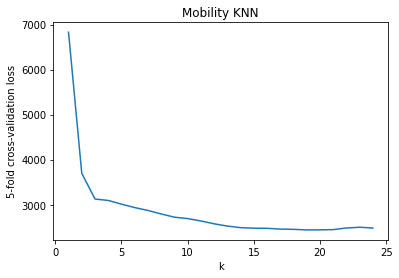

In [48]:
k_range = range(1, 25) # n_neighbors
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    loss = abs(cross_val_score(knn, X, y, cv=kf.split(X, y), scoring='neg_mean_squared_error'))
    k_scores.append(loss.mean())

import matplotlib.pyplot as plt 
plt.plot(k_range, k_scores)
plt.title('Mobility KNN')
plt.xlabel('k')
plt.ylabel('5-fold cross-validation loss')
plt.show()

In [49]:
# chosen model
k = 15
print("n_neighbors : {}\nunscaled cross validation loss: {}".format(k,k_scores[k-1]))
model_performances['mobility KNN'] = k_scores[k-1]
#statistics.mean(k_scores)

n_neighbors : 15
unscaled cross validation loss: 2478.208415416868


## Compare all models

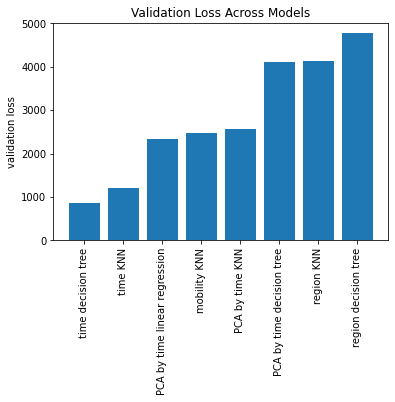

In [50]:
import matplotlib.pyplot as plt
model_performances = {k: v for k, v in sorted(model_performances.items(), key=lambda item: item[1])}
plt.title('Validation Loss Across Models')
plt.xticks(rotation='vertical')
plt.ylabel('validation loss')
plt.bar(list(model_performances.keys()), model_performances.values())
plt.show()